#**Assignment 1 ⭐**


###  Aims  

1.    I aim to highlight important information found through analysing and understanding the data provieded by you as the client, I will also identify the features that affect house prices the most and use those to train and test multiple models to be able to predict future house prices

2.   I will then use MAE(Checks how off on avarge the model is from the actual price) and other metrics like accurcy (probabilty that the model is right) to pick the best models. I will also take the complexity into consideration to avoid overfitting the model (basically the model learning too well on the training data and not well on unseen information)


3. I will use the K nearest clustering algorithm to group the houses by price and decide with metrics and judgment what number of groups to have for you as a client and then use classifcation to assign teams based on the number of clusters.




### Let's start by importing the libraries we need in order for us to pre-process the data, which basically means assessing the data and making changes accordingly  

In [ ]:
import pandas as pd #importing the relevant libraries
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import warnings
import seaborn as sns
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
house_data = pd.read_csv('houseprice.csv') #importing the relevent data

In [ ]:
house_data.head() # calling the data to see what were working with

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,$260/sqft,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021"
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,$140/sqft,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228"
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,$36/sqft,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211"
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,$677/sqft,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374"
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,$190/sqft,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169"


In [ ]:
hd = house_data #change the name just for simplicity (house data)

#**Pre-proccessing**

### We're going to check and clean the data first as there might be some missing values and inconsistences  

In [ ]:
hd.info() #checking for missing data and checking the type of data were dealing with
null_sum = hd.isnull().sum()

null_sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           30006 non-null  object 
 1   Sqr Ft          27786 non-null  object 
 2   Longitude       30006 non-null  float64
 3   Latitude        30006 non-null  float64
 4   Lot Size        25490 non-null  object 
 5   Beds            27420 non-null  float64
 6   Bath            27496 non-null  float64
 7   Year Built      26258 non-null  float64
 8   Price Sqr Ft    27271 non-null  object 
 9   Last Sold Year  14213 non-null  float64
 10  Last Sold For   14213 non-null  object 
 11  Address         30006 non-null  object 
 12  City            30006 non-null  object 
 13  State           30006 non-null  object 
 14  Zipcode         30003 non-null  float64
 15  Address Full    30006 non-null  object 
dtypes: float64(7), object(9)
memory usage: 3.7+ MB


Price                 0
Sqr Ft             2220
Longitude             0
Latitude              0
Lot Size           4516
Beds               2586
Bath               2510
Year Built         3748
Price Sqr Ft       2735
Last Sold Year    15793
Last Sold For     15793
Address               0
City                  0
State                 0
Zipcode               3
Address Full          0
dtype: int64

### Based on the output it is evident that we have some missing data and also some datatypes that we will have to change so that training and testing the model goes smoothly

In [ ]:
hd.describe() #using describe to get a better understanding of the data

,Longitude,Latitude,Beds,Bath,Year Built,Last Sold Year,Zipcode
count,30006.000000,30006.000000,27420.000000,27496.000000,26258.000000,14213.000000,30003.000000
mean,-95.167341,36.158007,3.288658,2.578688,1973.140224,2011.110673,59349.268440
std,15.454027,5.500075,1.472238,1.448891,34.512400,6.596002,27206.130444
min,-150.047160,25.550295,1.000000,0.750000,1800.000000,1987.000000,2108.000000
25%,-106.742751,32.747084,3.000000,2.000000,1950.000000,2006.000000,33137.000000
50%,-93.390977,36.016481,3.000000,2.000000,1978.000000,2013.000000,68124.000000
75%,-81.638904,40.017658,4.000000,3.000000,2004.000000,2017.000000,85016.000000
max,-70.997740,61.442024,65.000000,98.000000,2019.000000,2019.000000,99587.000000


### Time to deal with the missing values and data types (allowing us to predict properly and use the data more efficiently)

In [ ]:
hd['Price'].dtype # Beacuse price is the focus of this project we will start by changing its datatype as we know it is an object

dtype('O')

### Let's deal with the price datatype first as we need it to train and predict. The datatype needs to be a float or int (number) to be able to predict later on. First, we need to get rid of any digit that is not a number, and then we will turn the data type in price into a float(Decimal numbers).

In [ ]:
hd['Price'] = hd['Price'].str.replace('$', '',regex=False) #getting rid of the doller sign
hd['Price'] = hd['Price'].str.replace(',', '', regex=False) #'getting rid of ','
hd['Price'] = hd['Price'].str.replace('+', '', regex=False)
hd['Price'] = hd['Price'].str.replace('/mo', '', regex=False)


In [ ]:
hd['Price']

0         895900
1         247000
2          44900
3         959000
4          83500
          ...   
30001     300000
30002     119000
30003     210000
30004     329000
30005    4500000
Name: Price, Length: 30006, dtype: object

In [ ]:
MissingPvalues = hd['Price'].isna() #checking the missing values

M_count = MissingPvalues.sum()

print(f'The number of missing values in price is {M_count}')

#some of the data in the price column may not be able to be an int or float, to fix this we need to covert these to NaN and the drop those rows


hd['Price'] = hd['Price'].replace('Contact For Estimate', np.nan) #turning lables that are not numbers into NaN so we can drop
hd['Price'] = hd['Price'].replace('Contact For Price', np.nan) #turning lables that are not num into

hd['Price'] = hd['Price'].astype(float)

#Beacuse there are some values that are not numric, they beacome NaN  resulting in some missing values
#Im going to drop these

hd.dropna(subset=['Price'], inplace=True) #dropping the rows with missing price data

type1 = hd['Price'].dtype

print(f'The Datatype for price is now {type1}') # The price column is now also a floar, lest repeat this proccess for any data that needs to be an int or float



The number of missing values in price is 0
The Datatype for price is now float64


### Although the were no missing values in the price column, some of the data was not numeric. hence why we turned them into 'np.nan' which simply means that we made them empty allowing us to drop them and then turn the column into a float datatype.  I also dropped them because if we replaced them with 0, when doing house predictions the model we'll train may assume that certain features result in the house price being 0.  

### Lets turn necessary object datatypes columns into int and floats so that we can use them to then predict house prices - We're doing this to allow the model to train properly as ML models only take numeric dataTypes which are Ints and floats

In [ ]:
def clean_and_convert(column):  #creating a function that i can apply to all of the relevent columns as they all have strange digits in them and I only want int or floats
    column = column.astype(str)
    column = column.str.replace('sqft', '', regex=False)
    column = column.str.replace(',', '', regex=False)
    column = column.str.replace('/sqft', '', regex=False)
    column = column.str.replace('$', '', regex=False)
    column = column.str.replace('acres', '', regex=False)
    column = column.str.replace('acre', '', regex=False)
    column = column.str.replace('/', '', regex=False)

    column.replace('', np.nan, inplace=True)
    column = column.astype(float)
    return column

# applying the function to all the relevent columns
hd['Lot Size'] = clean_and_convert(hd['Lot Size'])
hd['Sqr Ft'] = clean_and_convert(hd['Sqr Ft'])
hd['Price Sqr Ft'] = clean_and_convert(hd['Price Sqr Ft'])
hd['Last Sold For'] = clean_and_convert(hd['Last Sold For'])




new_type1 = hd['Lot Size'].dtype
new_type2 = hd['Sqr Ft'].dtype
new_type3 = hd['Price Sqr Ft'].dtype
new_type4 = hd['Last Sold For'].dtype

print(f'The new Datatype for Lot Size is {new_type1}')
print(f'The new Datatype for Sqr Ft is {new_type2}')
print(f'The new Datatype for Price Sqr Ft is {new_type3}')
print(f'The new Datatype for Last Sold For is {new_type4}')

The new Datatype for Lot Size is float64
The new Datatype for Sqr Ft is float64
The new Datatype for Price Sqr Ft is float64
The new Datatype for Last Sold For is float64


### As you can see in the dtype column below we now have the needed datatype in order for us to predict future house prices and draw further insight, allowing your company to get a competitive edge!

In [ ]:
hd.info() #looking at the new datatypes we now have.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29779 entries, 0 to 30005
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           29779 non-null  float64
 1   Sqr Ft          27573 non-null  float64
 2   Longitude       29779 non-null  float64
 3   Latitude        29779 non-null  float64
 4   Lot Size        25286 non-null  float64
 5   Beds            27241 non-null  float64
 6   Bath            27308 non-null  float64
 7   Year Built      26047 non-null  float64
 8   Price Sqr Ft    27270 non-null  float64
 9   Last Sold Year  14109 non-null  float64
 10  Last Sold For   14109 non-null  float64
 11  Address         29779 non-null  object 
 12  City            29779 non-null  object 
 13  State           29779 non-null  object 
 14  Zipcode         29776 non-null  float64
 15  Address Full    29779 non-null  object 
dtypes: float64(12), object(4)
memory usage: 3.9+ MB


## Dealing with missing values  

In [ ]:
hd.isnull().sum() #showcasing the amount of missing values for each column

Price                 0
Sqr Ft             2206
Longitude             0
Latitude              0
Lot Size           4493
Beds               2538
Bath               2471
Year Built         3732
Price Sqr Ft       2509
Last Sold Year    15670
Last Sold For     15670
Address               0
City                  0
State                 0
Zipcode               3
Address Full          0
dtype: int64

### There is some missing data in the beds column. , I want to use the average, however, I want to visually showcase why using the average is a good idea by comparing the year built to the number of beds and looking at the probability of the number of beds (in a bar chart) to see if the number of beds where similar by year   

### We're are using the average to aviod losing benficial data.  We know that the number of beds a house has contrabuites to the overall price, however the model we're going to train does not know that, this may lead to it picking up a pattern that dictates houses with 0 beds (missing data) are more expernsive and we know that to not be the case in real life

In [ ]:
largest_date = hd['Year Built'].min(), hd['Year Built'].max()
print(f'The smallest and largest dates in this dataset are {largest_date}') #looking at the largest and smallest dates

The smallest and largest dates in this dataset are (1800.0, 2019.0)


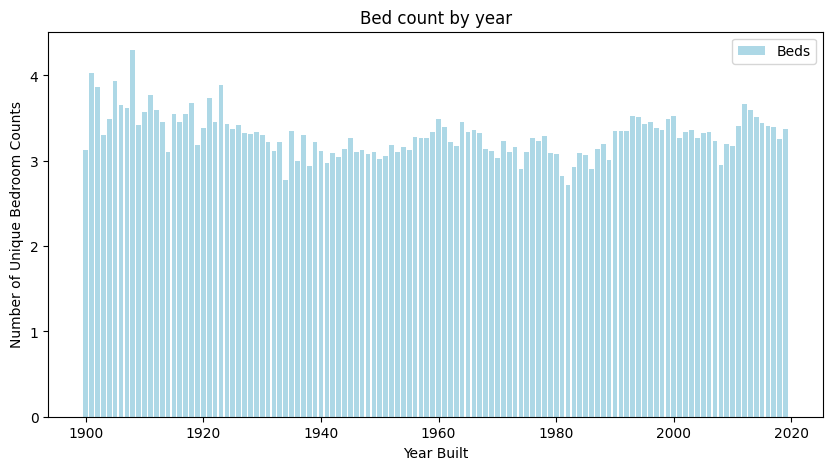

In [ ]:
date = hd[(hd['Year Built'] >= 1900) & (hd['Year Built'] <= 2019)] #using these years as the start and finsih points of the bar chart
#I started at 1900 as the data becomes consistant from this point, and as time goes on we want to use the most relevent data

# counting the avarge number of beds for each year
year_bed_counts = date.groupby('Year Built')['Beds'].mean().reset_index()

# sorting by year built
year_bed_counts = year_bed_counts.sort_values(by='Year Built')

# Creating a bar chart
plt.figure(figsize=(10, 5))  # size of chart
plt.bar(year_bed_counts['Year Built'], year_bed_counts['Beds'], color='lightblue', label='Beds')
plt.xlabel('Year Built')
plt.ylabel('Number of Unique Bedroom Counts')
plt.title('Bed count by year')
plt.legend()



### We can conclude from the Graph above that when looking from a holistic prospective, the number of average beds are similar by year meaning that we can fill in the missing beds columns with the average to avoid losing beneficial data. We start with 1900 as we want to use the most relevant information.

### The graph below also suggest that a home is most likley to have 3 beds  further proving that it is a resaonable option to use the mean

In [ ]:
import plotly.express as exp

hist = exp.histogram(data_frame = date, x= date["Beds"], histnorm="probability")

hist.show()

In [ ]:
avrBed = hd['Beds'].mean()
hd['Beds'].fillna(avrBed, inplace=True) #filling the missing values with the mean

In [ ]:
missing = hd['Beds'].isna() #missing values

totalMiss = missing.sum()

print(f'The are now {totalMiss} missing values in the bed column') #showcasing that there are now no missing values in the bed column

The are now 0 missing values in the bed column


### Lets deal with the rest of the missing values by understanding how many we have and then either using the mean like before if it makes sense to do so, or dropping them if necessary based on the effect they may have on the house price

In [ ]:
missing_values = hd.isnull().sum()
missing_values #looking at all the columns with missing values

Price                 0
Sqr Ft             2206
Longitude             0
Latitude              0
Lot Size           4493
Beds                  0
Bath               2471
Year Built         3732
Price Sqr Ft       2509
Last Sold Year    15670
Last Sold For     15670
Address               0
City                  0
State                 0
Zipcode               3
Address Full          0
dtype: int64

In [ ]:
missing_values.sum()  #total sum of missing values

46754

In [ ]:
hd.describe()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Last Sold Year,Last Sold For,Zipcode
count,2.977900e+04,2.757300e+04,29779.000000,29779.000000,2.528600e+04,29779.000000,27308.000000,26047.000000,2.727000e+04,14109.000000,1.410900e+04,29776.000000
mean,5.298073e+05,5.106432e+03,-95.170505,36.152506,5.380128e+03,3.289123,2.582902,1973.197105,3.867298e+02,2011.130342,3.481056e+05,59360.338561
std,1.141219e+06,2.494367e+05,15.452326,5.499982,2.301123e+05,1.410467,1.450768,34.517252,1.006869e+04,6.595686,1.191586e+06,27201.287875
min,1.000000e+00,1.000000e+00,-150.047160,25.550295,2.500000e-01,1.000000,0.750000,1800.000000,0.000000e+00,1987.000000,1.000000e+00,2108.000000
25%,1.850000e+05,1.288000e+03,-106.743590,32.746010,1.950000e+00,3.000000,2.000000,1950.000000,1.190000e+02,2006.000000,1.130000e+05,33137.000000
50%,3.099000e+05,1.800000e+03,-93.393970,36.014683,3.920000e+03,3.000000,2.000000,1978.000000,1.670000e+02,2013.000000,2.100000e+05,68127.000000
75%,5.345000e+05,2.547000e+03,-81.639753,40.016461,6.875000e+03,4.000000,3.000000,2004.000000,2.660000e+02,2017.000000,3.775000e+05,85016.000000
max,6.000000e+07,3.600380e+07,-70.997740,61.442024,3.659040e+07,65.000000,98.000000,2019.000000,1.100000e+06,2019.000000,1.200000e+08,99587.000000


#### Like beds we're going to use the average to fill missing values for baths. The reason being is that the average bath is 2.5 and with that, when filling in missing values and predicting later on, the average will not  have a major affect on house prices but can still be beneficial to the model  

#### I am avoiding using 0 for missing values in the "Bath" column as it suggests that all missing values imply houses have no bathrooms. This could introduce bias and affect  analysis and house price prediction later on as the model might see a pattern of 0 baths leading to higher prices which is not the case in real life hence why using the average is better.

### The Code below shows the probility of the number of baths, this allows us to look at outliers and further decide what to use to fill missing values, the highest porp is 2 hence why we will use 2, the mean is 2.57 and we know that we cant have half a bath so well use 2  and the popbablity of a home being 6 is 0.01 so we will drop any baths with anything over 5


In [ ]:
import plotly.express as exp

hist = exp.histogram(data_frame = date, x= date["Bath"], histnorm="probability")

hist.show()

### In the code below were testing to see if the using the average will have any major implications on the data to prove my theory. if the dashed line is close to the centre of the original bath data (Blue) it implies that using the average will not have any significant effect on the data overall, meaning that using it will be okay to do as apose to dropping rows (leading to loss of helpfull price prediction information) or replacing missing values with 0

In [ ]:
hd = hd[hd['Bath']>=1]
hd = hd[hd['Bath']<=5]

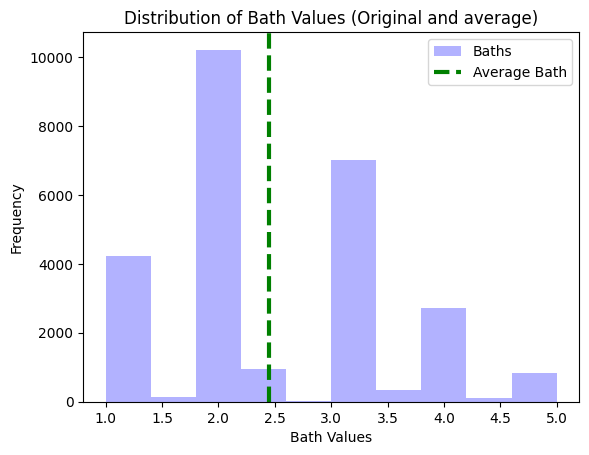

In [ ]:
average_bath = hd['Bath'].mean() #storing the avarge baths

#plotting to show the distrabution
plt.hist(hd['Bath'] ,color='blue', alpha=0.3, label='Baths')
plt.axvline(average_bath, color='green', linestyle='dashed', linewidth=3, label='Average Bath')
plt.xlabel('Bath Values',)
plt.ylabel('Frequency')
plt.title('Distribution of Bath Values (Original and average)')
plt.legend()
plt.show()


### Because the dashed green line is close to the centre, it suggests that the mean represents the distribution or (spread) of the bath data well meaning using it to fill missing values would be okay, however we can't have half a bath so i will use 2 as the imputation

### Lets fill the missing Bath values with the average based on our findings

In [ ]:
# Now to use the avarge to fill the null bed values
 #filling the missing values with the mean
bath_null_index = hd[hd['Bath'].isnull()==True].index
for i in bath_null_index:
  hd.loc[i,'Bath'] = 2
#as you can see now have no missing values in the Bath column
miss = hd['Bath'].isna()
total = miss.sum()

print(f'The number of missing values from the bath column is now also {total}')

The number of missing values from the bath column is now also 0


### I want to visually showcase which columns would have the most impact on the prediction later on and why it is impoartant to drop these columns.

In [ ]:
hd.isnull().sum()

Price                 0
Sqr Ft              320
Longitude             0
Latitude              0
Lot Size           4317
Beds                  0
Bath                  0
Year Built         1841
Price Sqr Ft        592
Last Sold Year    13189
Last Sold For     13189
Address               0
City                  0
State                 0
Zipcode               0
Address Full          0
dtype: int64

### The is an evident difference when it comes to the number of missing values when you compare them to each other, which is visually represented by the graph below. This difference is why I am going to drop the columns with the largest missing data, reason being is because if they are replaced with 0 or anything else they will have a huge effect on the overall performance of the model which can result in inaccuracy

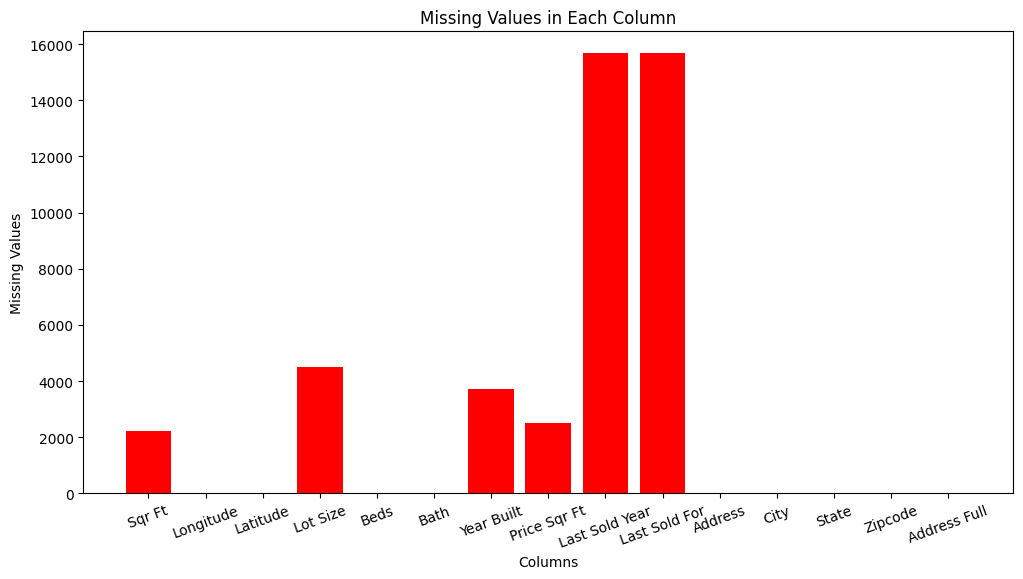

In [ ]:
#missing values each column
col = ['Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath', 'Year Built', 'Price Sqr Ft',
           'Last Sold Year', 'Last Sold For', 'Address', 'City', 'State', 'Zipcode', 'Address Full']
missing = [2206, 0, 0, 4493, 0, 0, 3732, 2509, 15670, 15670, 0, 0, 0, 3, 0]

# creating bar chart to visualize missing values
plt.figure(figsize=(12, 6))
plt.bar(col, missing, color='red')
plt.xticks(rotation=20)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in Each Column')
plt.show()


## Lets drop the 2 largest as if we replaced them they would have a huge affert on the overall performance of the model.

In [ ]:
# Dropping most problamatic columns
#Columns to drop
coml_to_drop = ['Last Sold Year', 'Last Sold For']

hd = hd.drop(coml_to_drop,axis=1)

## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value

In [ ]:
## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value ## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value ## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value ## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value ## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value ## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value ## Imputing missing data in columns such as lot size as they contribute to the overall price prediction and I want to avoid dropping them and losing beneficial data. Iterative imputer is essentially looking in on the one column and using the features around it to predict the potential outcome of that missing value from sklearn.experimental import enable_iterative_imputer  # imputing the missing values for lotzise by using an inbuilt model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

it_impu = IterativeImputer()

hd['Lot Size'] = it_impu.fit_transform(np.array(hd['Lot Size']).reshape(-1, 1))
miss = hd['Lot Size'].isna()
total = miss.sum()

print(f'The number of missing values from the Sqr Ft column is now also {total}')


hd['Year Built'] = it_impu.fit_transform(np.array(hd['Year Built']).reshape(-1, 1))
miss = hd['Year Built'].isna()
tot = miss.sum()

print(f'The number of missing values from the year built column is now also {tot}')

The number of missing values from the Sqr Ft column is now also 0
The number of missing values from the year built column is now also 0


### I was tempted to use the mean for sqr ft so I ran it through the distribution test, and as a result, we can conclude that the average doesn't represent the distribution well as it is not in the centre. As a result, I will use the Iterative imputer instead

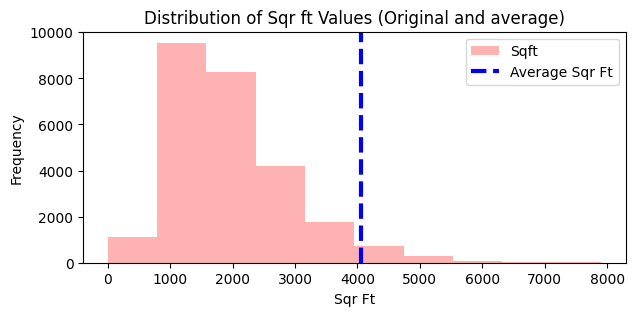

In [ ]:
average_Sqrft = hd['Sqr Ft'].mean() #storing the avarge sqr ft

#plotting to show the distrabution
plt.figure(figsize=(7, 3))
plt.hist(hd[hd['Sqr Ft']<8000]['Sqr Ft'],color='red', alpha=0.3, label='Sqft')
plt.axvline(average_Sqrft, color='blue', linestyle='dashed', linewidth=3, label='Average Sqr Ft')
plt.xlabel('Sqr Ft',)
plt.ylabel('Frequency')
plt.title('Distribution of Sqr ft Values (Original and average)')
plt.legend()
plt.show()

In [ ]:
hd['Sqr Ft'] = it_impu.fit_transform(np.array(hd['Sqr Ft']).reshape(-1,1))
missing = hd['Sqr Ft'].isna().sum()

print (f'The is now {missing} missing in the Sqr Ft column')

The is now 0 missing in the Sqr Ft column


### Because we can not use the price sqr ft column when it comes to prediction, I have used the stored median price sqr ft by city instead(the median is less sensitive to extreme values making it a better option to use) and aim to use that as a feature as it is reasonable to expect you as a client to have that type of information.

In [ ]:
mid_PriceSqrFt_city = hd.groupby('City')['Price Sqr Ft'].median()
mid_PriceSqrFt_city

City
Alamo Heights     252.0
Albuquerque       135.5
Aledo             160.5
Amherst           127.0
Anaheim           397.0
                  ...  
Woodhaven         504.0
Woodland Hills    424.0
Woodside          460.0
Worthington       124.5
Yukon             126.5
Name: Price Sqr Ft, Length: 632, dtype: float64

In [ ]:
hd['mid_PriceSqrFt_city'] = hd['City'].map(mid_PriceSqrFt_city)


In [ ]:
hd[['City','mid_PriceSqrFt_city']]

,City,mid_PriceSqrFt_city
0,Phoenix,184.0
1,Dallas,194.0
2,Buffalo,86.5
3,Flushing,619.0
4,Miami Gardens,176.0
...,...,...
29999,Fort Worth,130.0
30000,Philadelphia,176.0
30001,Miami,306.0
30002,Modesto,206.5


In [ ]:
hd['mid_PriceSqrFt_city'] = it_impu.fit_transform(np.array(hd['mid_PriceSqrFt_city']).reshape(-1, 1))
miss = hd['mid_PriceSqrFt_city'].isna()
total = miss.sum()

hd['mid_PriceSqrFt_city'].isnull().sum()

0

In [ ]:
hd['Price Sqr Ft'] = it_impu.fit_transform(np.array(hd['Price Sqr Ft']).reshape(-1,1))
hd['Price Sqr Ft'].isnull().sum()## checking the missing values

0

### Dealing with Price as we have some outliers - That may affect price prediction - Beacuse price is what we are trying top predict, need to be aware of some of the outliers that may affect price. The graph below showcass the propbabilty of a price being below the price shown. We can use this information to denote what price range we should start from and end at.

In [ ]:
import plotly.express as exp

graph = exp.ecdf(data_frame=hd, x=hd["Price"])

graph.show() #This plot shows that propbebilty of that the being what it is below the price shown

### Based on the results it is reasonable to stop at 2.1 million as 97% of prices are below that point and we can start at 50K as only 0.02% of houses are in that range meaning prices below that range are not of impotence


In [ ]:
# Based on our finding let us now drop the rows with those values as methionded
hd = hd[hd['Price']>=50000]
hd

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Address,City,State,Zipcode,Address Full,mid_PriceSqrFt_city
0,895900.0,3447.00000,-112.081985,33.560055,7895.000000,4.000000,4.5,2019.0,260.00000,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",184.0
1,247000.0,1767.00000,-96.676250,32.829227,7877.000000,3.000000,2.0,1954.0,140.00000,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",194.0
3,959000.0,1417.00000,-73.860170,40.722960,2598.000000,3.000000,2.0,1939.0,677.00000,"6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",619.0
4,83500.0,440.00000,-80.206314,25.937965,5799.106612,3.289123,1.0,1971.0,190.00000,"251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",176.0
5,1295000.0,3814.00000,-111.943670,33.494385,0.550000,4.000000,4.0,1957.0,340.00000,"6333 E Lafayette Blvd Scottsdale, AZ 85251",Scottsdale,AZ,85251.0,"6333 E Lafayette Blvd, Scottsdale, AZ 85251",257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999,171000.0,1269.00000,-97.469190,32.755436,7860.000000,3.000000,2.0,2001.0,135.00000,"428 S Las Vegas Trl Fort Worth, TX 76108",Fort Worth,TX,76108.0,"428 S Las Vegas Trl, Fort Worth, TX 76108",130.0
30000,409990.0,1720.00000,-75.173980,39.932940,672.000000,3.000000,2.5,1920.0,238.00000,"1432 S Bouvier St Philadelphia, PA 19146",Philadelphia,PA,19146.0,"1432 S Bouvier St, Philadelphia, PA 19146",176.0
30001,300000.0,733.00000,-80.187720,25.771372,5799.106612,1.000000,1.0,2008.0,409.00000,"300 S Biscayne Blvd #T-3507 Miami, FL 33131",Miami,FL,33131.0,"300 S Biscayne Blvd #T-3507, Miami, FL 33131",306.0
30002,119000.0,1716.00000,-121.031560,37.680702,18.840000,3.000000,2.0,1998.0,69.00000,"2621 Prescott Rd #161 Modesto, CA 95350",Modesto,CA,95350.0,"2621 Prescott Rd #161, Modesto, CA 95350",206.5


In [ ]:
# Based on our finding let us now drop the rows with those values as methionded
hd = hd[hd['Price']<2100000]
hd

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Price Sqr Ft,Address,City,State,Zipcode,Address Full,mid_PriceSqrFt_city
0,895900.0,3447.00000,-112.081985,33.560055,7895.000000,4.000000,4.5,2019.0,260.00000,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",184.0
1,247000.0,1767.00000,-96.676250,32.829227,7877.000000,3.000000,2.0,1954.0,140.00000,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",194.0
3,959000.0,1417.00000,-73.860170,40.722960,2598.000000,3.000000,2.0,1939.0,677.00000,"6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",619.0
4,83500.0,440.00000,-80.206314,25.937965,5799.106612,3.289123,1.0,1971.0,190.00000,"251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",176.0
5,1295000.0,3814.00000,-111.943670,33.494385,0.550000,4.000000,4.0,1957.0,340.00000,"6333 E Lafayette Blvd Scottsdale, AZ 85251",Scottsdale,AZ,85251.0,"6333 E Lafayette Blvd, Scottsdale, AZ 85251",257.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29999,171000.0,1269.00000,-97.469190,32.755436,7860.000000,3.000000,2.0,2001.0,135.00000,"428 S Las Vegas Trl Fort Worth, TX 76108",Fort Worth,TX,76108.0,"428 S Las Vegas Trl, Fort Worth, TX 76108",130.0
30000,409990.0,1720.00000,-75.173980,39.932940,672.000000,3.000000,2.5,1920.0,238.00000,"1432 S Bouvier St Philadelphia, PA 19146",Philadelphia,PA,19146.0,"1432 S Bouvier St, Philadelphia, PA 19146",176.0
30001,300000.0,733.00000,-80.187720,25.771372,5799.106612,1.000000,1.0,2008.0,409.00000,"300 S Biscayne Blvd #T-3507 Miami, FL 33131",Miami,FL,33131.0,"300 S Biscayne Blvd #T-3507, Miami, FL 33131",306.0
30002,119000.0,1716.00000,-121.031560,37.680702,18.840000,3.000000,2.0,1998.0,69.00000,"2621 Prescott Rd #161 Modesto, CA 95350",Modesto,CA,95350.0,"2621 Prescott Rd #161, Modesto, CA 95350",206.5


In [ ]:
warnings.filterwarnings('ignore')
hd.dropna(inplace=True) #
missing = hd.isnull().sum().sum()
print(f'we now have {missing} missing values')

we now have 0 missing values


#**Visualising the data for insights**

### Now that we have preprocessed the data (cleaned), we can now look for any evident trends by visualizing the cleaned data

### The Graph below shows that with an increased number of baths, the price of the house also increases, this allows you as a client to understand and get a feel of the prices you may be dealing with simply by knowing the number of baths a property has, allowing you to have a rough estimation of the property price, before it is even built allowing for a competitive edge.
#### This also shows that the houses that sell at the highest price for you as a client typically have 4  baths

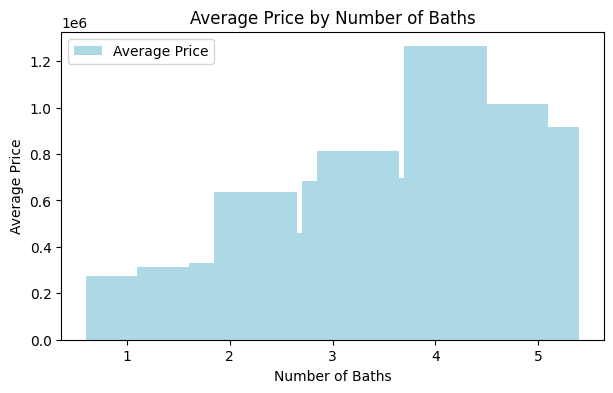

In [ ]:
numBath = hd[(hd['Bath'] >= 1) & (hd['Bath'] <= 7)]

# average price for each number of baths
avg_price_by_bath = numBath.groupby('Bath')['Price'].mean().reset_index()

# sorting by the number of baths
avg_price_by_bath = avg_price_by_bath.sort_values(by='Bath')

# creating the chart
plt.figure(figsize=(7, 4))
plt.bar(avg_price_by_bath['Bath'], avg_price_by_bath['Price'], color='lightblue', label='Average Price', )
plt.xlabel('Number of Baths')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Baths')
plt.legend()
plt.show()

### The heat map below shows the correlation between each column, it allows us to know which features have the most significant relationship with the price. The reason why this is important for the business is because we can begin to know which features to look out for when it comes to price prediction, and the kind of effects different features have on the price of homes and each other.

### From the heatmap we can conclude that the number of beds, baths and last sold for(price) affect and correlate with price the most.  

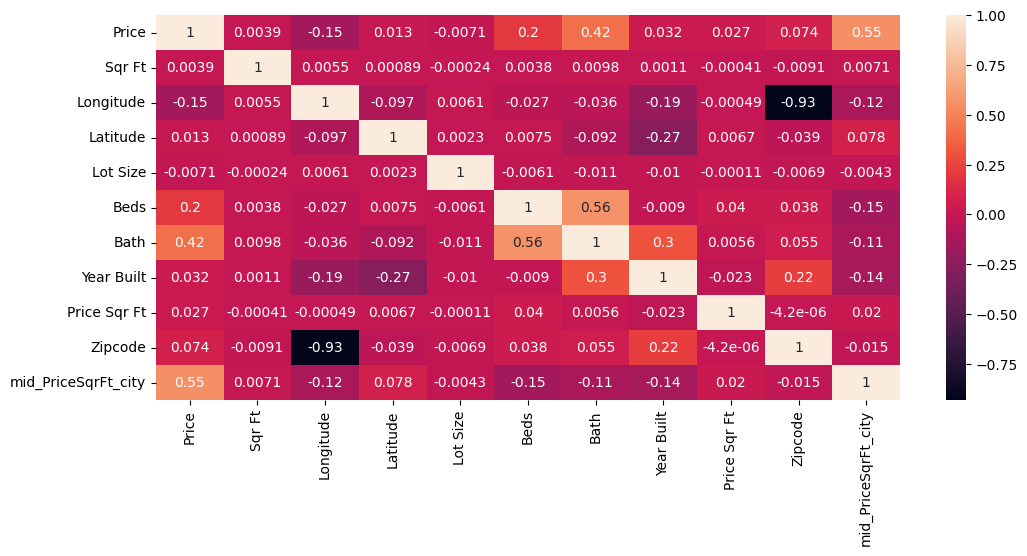

In [ ]:
plt.figure(figsize=(12,5)) #the figyre size
sns.heatmap(hd.corr(), annot=True) #heatmap
plt.show()

### Average Price of properties by year

### Based on the nature of the problem, it will be beneficial for you as a client to understand what years had the highest house pricing and lowest house pricing, reason being is because we can get to dive deep and try to understand the reasons why prices either increased or dropped by year.

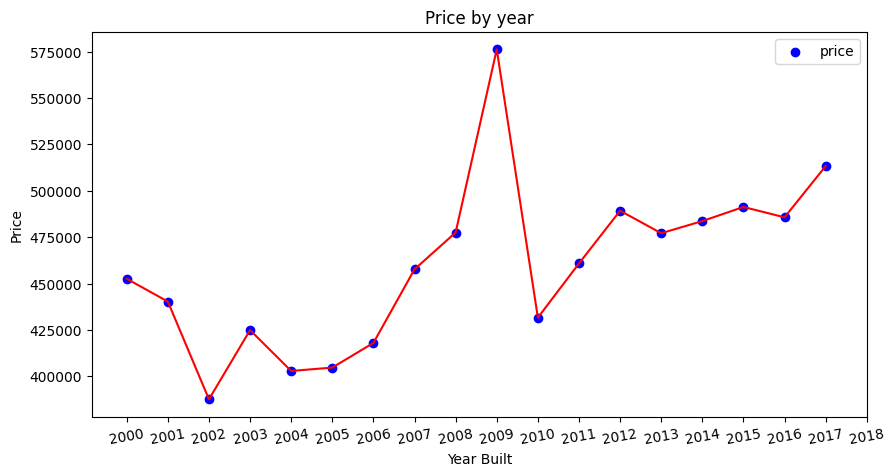

In [ ]:
date = hd[(hd['Year Built'] >= 2000) & (hd['Year Built'] <= 2017)] #using these years as the start and finsih points of the plot chart

# counting the avarage price for each year
year_bed_counts = date.groupby('Year Built')['Price'].mean().reset_index()

# sorting by year built
year_bed_counts = year_bed_counts.sort_values(by='Year Built')

# Creating a bar chart
plt.figure(figsize=(10, 5))  # size of chart
plt.scatter(year_bed_counts['Year Built'], year_bed_counts['Price'], color='blue', label='price')
plt.plot(year_bed_counts['Year Built'], year_bed_counts['Price'], linestyle = '-',color='red')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.xticks(list(range(2000,2019,1)),rotation=10)
plt.title('Price by year')
plt.legend()
plt.show()

### We can see that sales had a dramatic decrease from 2009 through to 2011. I did some external research on https://www.noradarealestate.com/blog/housing-market-crash-2008/ and concluded that the reason for this drop was because of the housing crash in 2008.


### Events like these lead to a decline in the prices of homes. I say this because new events like this and COVID can cause a similar effect on the US housing market, however after these events, the business can capitalize because house prices often shoot up after some time which is shown here: (https://www.bankrate.com/real-estate/covid-impact-on-the-housing-market/#market). Because we are analysing the data and pushing for insights it is critical that you as a client in the US are aware of these potential events affecting sales and prepare for a potential drop as well as a potential increase.

### Sales by State

### Another critical point that will help the development of the company is understanding which city generates the most sales, This allows the business to know where to focus their efforts to maximize potential earnings.  

In [ ]:
hd['State'].value_counts() #checking the occurances of each state in the dataset

TX    4323
FL    2446
CA    2204
AZ    1541
NV    1338
OH    1159
NY     976
CO     964
NC     893
IL     873
PA     813
MN     748
GA     723
VA     614
MD     546
TN     505
WA     452
IN     428
OK     427
KY     400
OR     397
LA     356
WI     346
NE     290
NM     234
MI     214
DC     202
MA     194
AL     148
ID     138
IA     131
AK     130
KS     123
NJ      55
Name: State, dtype: int64

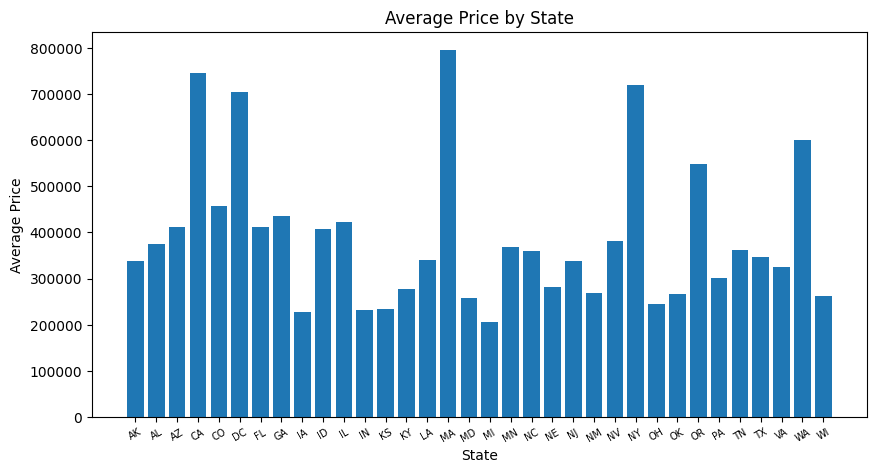

In [ ]:
pricebystate = hd.groupby('State')['Price'].mean() #Grouping the avarge Price by state


state= pricebystate.index
price= pricebystate.values #The avarge price

#plotting the bar chart :)
plt.figure(figsize=(10,5))
plt.bar(state, price)
plt.title('Average Price by State')
plt.xticks(rotation = 30, size =7)
plt.xlabel('State')
plt.ylabel('Average Price')
plt.show()


### The graph above shows the significance when it comes to the state with the highest price sales. This information allows us to know where the most money is generated for the company alongside with where to focus your efforts in order to continue to grow. States such as CA, MA and NY have the highest average price whereas sates like IA and MI have the lowest average price.

### Knowing this allows the company to know where to focus their expenses like advertisement's in order for continued growth, and also where they're lacking in order for them to be able to take some inspiration from states that are successful and potentially grow the lower earning states.

#**Crime Data**

I am referencing this information for you as a client to be aware of cities with the most crime so that you can potentially take calculated risks or further procedures like adding more security cameras to homes within these states.

### The dataset below can be found on https://corgis-edu.github.io/corgis/csv/state_crime/ and it repersents crimes by state in, visualizing this will allow you as a client to be aware of the trends within staes when it comes to most property crime and overal violent crime



In [ ]:
crime_data = pd.read_csv(r"crime_data.csv")

In [ ]:
crime_data.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [ ]:
crime_data.tail()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
3110,Wyoming,2015,586107,1902.6,300.6,1500.9,101.0,222.1,179.8,2.7,...,10.1,11151,1762,8797,592,1302,1054,16,173,59
3111,Wyoming,2016,585501,1957.3,302.5,1518.2,136.6,244.2,195.7,3.4,...,10.1,11460,1771,8889,800,1430,1146,20,205,59
3112,Wyoming,2017,579315,1830.4,275.0,1421.0,134.5,237.5,176.4,2.6,...,13.1,10604,1593,8232,779,1376,1022,15,263,76
3113,Wyoming,2018,577737,1785.1,264.0,1375.9,145.2,212.2,150.6,2.3,...,17.3,10313,1525,7949,839,1226,870,13,243,100
3114,Wyoming,2019,578759,1571.1,241.2,1206.7,123.2,217.4,147.6,2.2,...,11.6,9093,1396,6984,713,1258,854,13,324,67


### The crime data is relevant to the original data based in the similarity when it comes to years. The house data has data in the ranges of 1800 to 2020 and the crime data has dates in the ranges of 1960 to 2019 which indicates the relevance.

### To show the state with the most crime we first need to get the only relevant states. We only want the states that exist in the house data as that is what is relvent to the business

In [ ]:
NameChange = {
'California' : 'CA',
'Florida' : 'FL',
'Arizona' : 'AZ',
'Nevada' : 'NV',
'Ohio' : 'OH',
'Colorado' : 'CO',
'Pennsylvania' : 'PA',
'North Carolina' : 'NC',
'Illinois' : 'IL',
'Georgia' : 'GA',
'Maryland' : 'MD',
'New York' : 'NY',
'Tennessee' : 'TN',
'Virginia' : 'VA',
'Michigan' : 'MI',
'Washington' : 'WA',
'Oklahoma' : 'OK',
'Kentucky' : 'KY',
'Wisconsin' : 'WI',
'Oregon' : 'OR',
'Nebraska' : 'NE',
'Massachusetts' : 'MA',
'District of Columbia' :'DC',
'Alabama' : 'AL',
'Iowa' : 'IA',
'New Jersey' :'NJ'}


crime_data['State'] = crime_data['State'].map(NameChange)  #mapping the name change to relevent column in which we want the name changes

In [ ]:
 crime_data['State'].value_counts() # all that is relevent

AL    60
AZ    60
WA    60
VA    60
TN    60
PA    60
OR    60
OK    60
OH    60
NC    60
NJ    60
NV    60
NE    60
MI    60
MA    60
MD    60
KY    60
IA    60
IL    60
GA    60
FL    60
DC    60
CO    60
CA    60
WI    60
NY    55
Name: State, dtype: int64

### Now that the data looks the similar in terms of states we can now do some visualization's to see which state is the most danger's so that you as a customer are aware as it is not in the original data. This will allow you as a client to make better informed decisions when it comes things such as the worst and best places for property's based on locations in terms of crime


### 'Property all will' allow us to see the state with the worst Property crime, burglary, larceny, and motor related crime, I will l then visualize the violent crime overall to see which state is the worse in relation to that

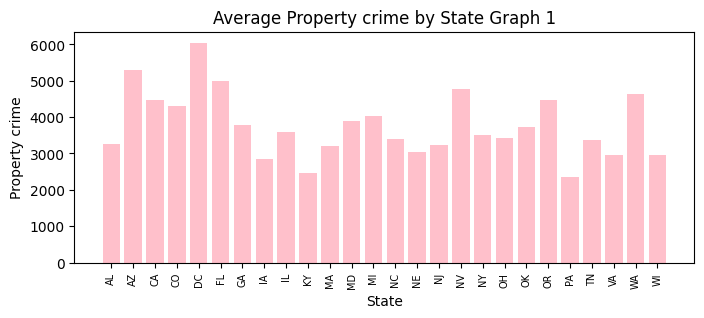

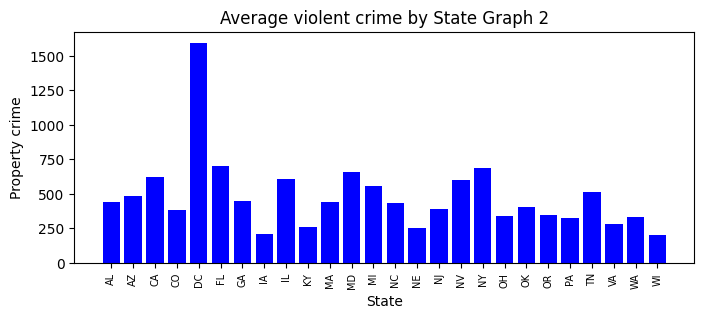

In [ ]:
crimebystate = crime_data.groupby('State')['Data.Rates.Property.All'].mean() #Grouping the avarge property crime by state


State= crimebystate.index # storing the index(state)
Crime= crimebystate.values #The avarge price

#plotting the bar chart :)
plt.figure(figsize=(8,3))
plt.bar(State, Crime, color='pink')
plt.title('Average Property crime by State Graph 1')
plt.xticks(rotation = 90, size =7)
plt.xlabel('State')
plt.ylabel('Property crime')
plt.show()


## Next to plot worst state by overall violent crime

crimebystate = crime_data.groupby('State')['Data.Rates.Violent.All'].mean() #Grouping the avarge violence by state


State= crimebystate.index # storing the index(state)
Crime= crimebystate.values #The avarge price

#plotting the bar chart :)
plt.figure(figsize=(8,3))
plt.bar(State, Crime, color='blue')
plt.title('Average violent crime by State Graph 2')
plt.xticks(rotation = 90, size =7)
plt.xlabel('State')
plt.ylabel('Property crime')
plt.show()



## Based on the Graphs we can conclude that property crime and violent crime is highest in Dc. Alongside with this we can see that property crime is also high in these following states Az, FL and NV. Like I said previously, knowing this allows you as a client to understand the risk you are taking in terms of the property crime and also violence in regards to the properties you sell and manage.

## These findings allow for a better understanding of the risk you run overall.

### additinol features for prediction later on, it is reasnolble to conculde that you have this type of inormation which is essitally the avarge number of baths for each number of beds

In [ ]:
warnings.filterwarnings('ignore')
avebathxbed  = hd.groupby('Bath')['Beds'].mean()
avabathxbedvalues= avebathxbed.values

hd['avebathxbed'] = hd['Beds'].map(avebathxbed)

hd = hd[hd['avebathxbed'].isnull() == False]

hd[['Beds','avebathxbed']]

,Beds,avebathxbed
0,4.0,4.184026
1,3.0,3.559235
3,3.0,3.559235
5,4.0,4.184026
6,3.0,3.559235
...,...,...
29998,2.0,2.959089
29999,3.0,3.559235
30000,3.0,3.559235
30001,1.0,2.154287


#**House Price Prediction**

### I will use the best features based on the correlation we plotted (Bath and Beds) first when it comes to prediction. I will then train test split multiple models and then chose the one with the best result whilst using multiple features.

<function matplotlib.pyplot.legend(*args, **kwargs)>

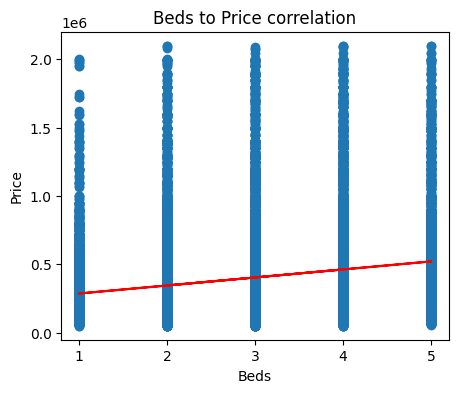

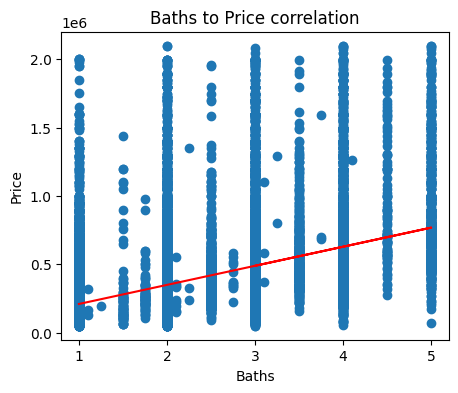

In [ ]:
x = np.array(hd[['Beds']])
y = np.array(hd[['Price']]) #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train,y_train) #training the model

y_pred = model.predict(x_test)

plt.figure(figsize=(5,4))
plt.scatter(x,y,label='Data')
plt.plot(x_test, y_pred, color='red', label='Linear Regression Line (Test Data)')
plt.title('Beds to Price correlation')
plt.xticks(list(range(1,6,1)))
plt.xlabel('Beds')
plt.ylabel('Price')
plt.legend

#fig 2

x = np.array(hd[['Bath']])
y = np.array(hd[['Price']]) #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

model2 = LinearRegression()
model2.fit(x_train,y_train) #training the model

y_pred = model2.predict(x_test)

plt.figure(figsize=(5,4))
plt.scatter(x,y,label='Data')
plt.plot(x_test, y_pred, color='red', label='Linear Line')
plt.title('Baths to Price correlation')
plt.xlabel('Baths')
plt.xticks(list(range(1,6,1)))
plt.ylabel('Price')
plt.legend


### Now lets combine the 2 features, split test and train multiple models and evaluate performance on results and MSE(testing how wrong the model was compared to the test set, the lower the better)

## Linear Model + Visualizations

### explain how the model works

In [ ]:

x = np.array(hd[['Beds','Bath']])
y = np.array(hd['Price'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42) #train test

model = LinearRegression() #calling the model
model.fit(x_train,y_train) #training the model

y_pred = model.predict(x_test) #testing

y_pred

mse = mean_absolute_error(y_test, y_pred) #visulizing the 2 feautures

import plotly.express as exp

plot = exp.scatter_3d(data_frame=hd, x=hd["Bath"], y=hd["Beds"], z=hd["Price"], color='State')

plot.show()

print(f'The mean absoulte error for this model based on the 2 features is {mse}')


#use rmean squard error
#//

##A terrible  performance when it comes to the prediction using a linear model, this isnt supprising as the data is not linear

The mean absoulte error for this model based on the 2 features is 198310.3492893541


### This graph showcases Distribution of beds and baths in relation to price for each state, this wall help us detect any pattens in a particular states and which are most widely present

In [ ]:
Max_price = hd['Price'].max()
print(f'The most expensive house is ${Max_price}')

The most expensive house is $2099999.0


### The mean absolute error is essentially indicating how far of the model is from the actual test price (the average value the model is wrong by), in this case the model is off by £403,008 on average. The price column  various in price with over 30,000 rows reaching hights of 35million, this prediction is not the best however in compression to high prices it is not that bad, but when it comes to lower priced homes this model would not perform well.  

### Lets try to test multiple features to see if we get a better prediction (lower error)

In [ ]:
# lets try to test multiple features to see the output

x = hd[['Beds','Bath', 'Year Built', 'Sqr Ft']]
y = hd['Price'] #first lets visulize what type of correlation we have with these features


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train,y_train) #training the model

y_pred = model.predict(x_test)

E = mean_absolute_error(y_test, y_pred)

print(f'The MAE is {E}')

The MAE is 197104.45665492467


### There is a improvement in regard's to using other features that preformed well in correlation to price, when  using a linear model. This essentially means the more features we use the better the out come. Lets try a different model

## Decision Tree Model  


### The absolute error below highlights that this model performs better than the linear model when it comes to using these features to predict. This is no surprise as the DT models are capable of capturing non linear relationships

In [ ]:
x = hd[['Beds','Bath', 'Year Built', 'Sqr Ft', 'mid_PriceSqrFt_city']]
y = hd['Price']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

Dmodel = DecisionTreeRegressor().fit(x_train, y_train)

Dpred = Dmodel.predict(x_test)

Derror = mean_absolute_error(Dpred, y_test)

print(f'The average error for this model is {Derror}')

The average error for this model is 143466.17796840958


### We received significant improvement when using a decision tree model, lets add more features to see if we can improve the model further.

### Based on the performance of the decsion tree model, I will use a random forest as it creates mutiple trees and combains the prediction allowing us to potentially get a better model.

## Random forest model



In [ ]:
x = hd[['Beds','Bath', 'Year Built','Sqr Ft', 'mid_PriceSqrFt_city', 'avebathxbed']]
y = hd['Price'] #first lets visulize what type of correlation we have with these features


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) ##splitting into test and train

Rmodel2 = RandomForestRegressor(n_estimators=150, max_depth=10).fit(x_train, y_train) #training the model n _estim is the number of trees

pred2 = Rmodel2.predict(x_test) #predicting


derror = mean_absolute_error(y_test, pred2)
print(f'mean absoulte errror: {derror}')

mean absoulte errror: 108261.09422953446


## I changed the hyperparments here and we impoved the models performance

In [ ]:
x = hd[['Beds','Bath', 'Year Built', 'Sqr Ft','Lot Size','mid_PriceSqrFt_city', 'avebathxbed', 'Latitude','Longitude', 'Zipcode']]
y = hd['Price'] #first lets visulize what type of correlation we have with these features
main_dataset = x.copy() #storing x
main_dataset_price = y.copy() #storing why for later classification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) ##splitting into test and train

Rmodel = RandomForestRegressor().fit(x_train, y_train) #training the model / just letting the model run eith out any est

pred2 = Rmodel.predict(x_test) #predicting

error = mean_absolute_error(pred2, y_test) #using the mean absolute to measure how bad the model is

error = mean_absolute_error(y_test, pred2)
print(f'mean absoulte errror: {error}')

mean absoulte errror: 92911.83858833094


## Although we have seen significant improvement when it comes to using the random forest, we will use a technique called stacking which essentially means we will combine multiple models together to try and improve the overall performance of predictions well

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

estimators = [
    ('bag', BaggingRegressor() ),
    ('Rf', RandomForestRegressor()),
    ('dt', DecisionTreeRegressor()),

]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor()
)

reg.fit(x_train,y_train)
predict_reg  = reg.predict(x_test)
error = mean_absolute_error(y_test, predict_reg)
print(f'The MAE is {error}')

The MAE is 93103.53110205251


### The Random forest model performed better as expected when using more features and better hyperparameter's. The MSA suggest that on average the model is of by £28,020 although this may seem like a lot, in actuality it is a good preforming model based on the how large the price column is as mentioned before.

### The best performing model is the model above as it gave the lowest average error and gave the best prediction compared to the other models, overall it is a pretty good model when it comes to prediction. Were not necessarily looking for an absolute error of 0 as it indicates that the model has learned the training a little to well and would not adapt that well to new data accordingly.

### We can also accept this to be the best result so far as we didn't drop necessary columns such as bath and beds  or just replace missing data with zero which would allow the model to perform well.  When it comes to new data where we have baths and beds ,for example, that unsurprisingly effect price, the model would not perform that well because it has not learned that relationship.  is this true

#

# **Clustering based on house price**

### The elbow method uses somthing called the inertia which essentially measures the distance from a clusters point to a data point (price) and aims to assign clusters (teams) based on their distance from a centroid (A main price chosen to use). The elbow method is used to find the best number of clusters by by looking at the inertias of different clusters and at the point in which the is no longer a change in the sharpness of the elbow that is the best cluster to use   

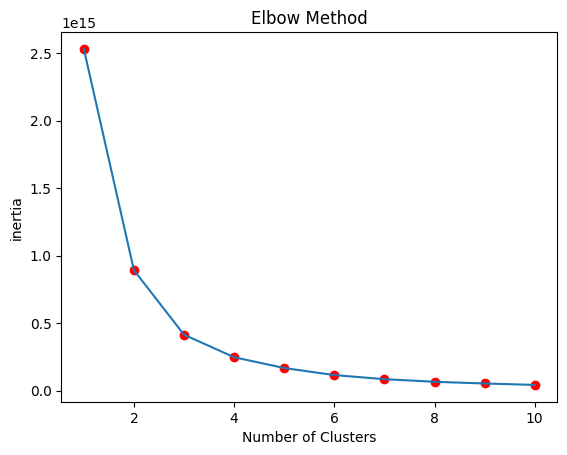

In [ ]:
import warnings
warnings.filterwarnings('ignore')

x = hd['Price'].values.reshape(-1, 1)

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.scatter(range(1, 11), wcss,color='r')
plt.show()

 ### Based on the result of the elbow we might enterally think that the best number of clusters would be 3 as that seems to be where the most significant change is, however when we look closely we can see that after 4 there is little to no change meaning that 4 is the best number of clusters at this stage. we'll try 3 neverless just to visually compare it to 4

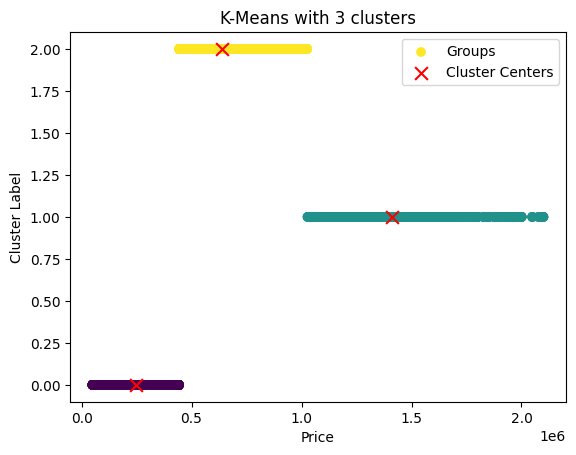

In [ ]:
warnings.filterwarnings('ignore')
x = hd['Price'].array.reshape(-1,1) #reshaping



k= 3 #starting of with 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42) #fiiting kmeans with the set number of clusters
y_pred = kmeans.fit_predict(x) #clustering on price

cluster_centers = kmeans.cluster_centers_


plt.scatter(x, y_pred, c=y_pred, cmap='viridis', label='Groups')
plt.scatter(cluster_centers, np.arange(k), c='red', marker='x', s=85, label='Cluster Centers')  # Plot cluster centers
plt.xlabel('Price')
plt.ylabel('Cluster Label')
plt.title('K-Means with 3 clusters')
plt.legend()

## Now lets see 4

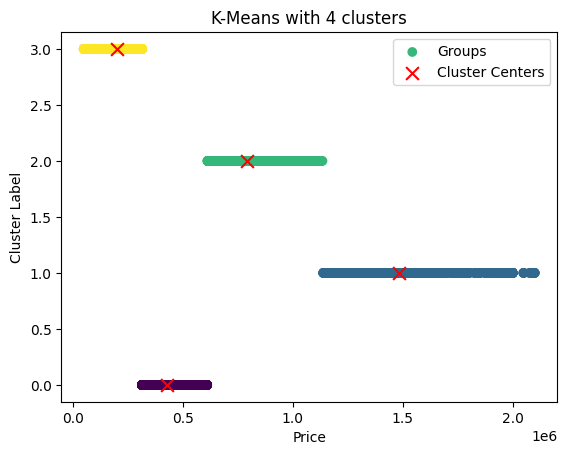

In [ ]:
warnings.filterwarnings('ignore')

x = hd['Price'].array.reshape(-1,1) #reshaping



k= 4 #using 4 clusters now
kmeans = KMeans(n_clusters=k, random_state=42) #fiiting kmeans with the set number of clusters
y_pred = kmeans.fit_predict(x) #clustering on price
categories = y_pred
cluster_centers = kmeans.cluster_centers_


plt.scatter(x, y_pred, c=y_pred, cmap='viridis', label='Groups')
plt.scatter(cluster_centers, np.arange(k), c='red', marker='x', s=85, label='Cluster Centers')  # Plot cluster centers
plt.xlabel('Price')
plt.ylabel('Cluster Label')
plt.title('K-Means with 4 clusters')
plt.legend()

### Based the results of the clusters  and my own understanding when it comes to house prices, I have concluded that 4 teams would be best. My reasoning is primarly beacuse when we look at 3 teams the luxdry team(1) is extremly streched out incating that there is room for 1 more team.

#**Classifying based on clusters to assign new homes to the right team**

In [ ]:
#Useing classfiers - decsion tree classifer, SVC and random forest
cluster_dataset = main_dataset.join(main_dataset_price)

In [ ]:
cluster_dataset['categories'] = categories

In [ ]:
x_class = cluster_dataset[['Beds','Bath','Year Built', 'Zipcode', 'Sqr Ft','Lot Size','mid_PriceSqrFt_city', 'avebathxbed']].copy()
y_class = cluster_dataset['categories'].copy()

In [ ]:
X_train_class,X_test_class,y_train_class,y_test_class = train_test_split(x_class,y_class,test_size=0.15,shuffle=True)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_class, y_train_class)
print(xgb.score(X_test_class, y_test_class))

sc = SVC(probability=True)
sc.fit(X_train_class,y_train_class)#raining the model on the data
print(sc.score(X_test_class,y_test_class))#


rf = RandomForestClassifier()
rf.fit(X_train_class, y_train_class)
print(rf.score(X_test_class, y_test_class))

dc = DecisionTreeClassifier()
dc.fit(X_train_class, y_train_class)
print(dc.score(X_test_class, y_test_class)) #x test is  used to make predic inside the function then those predicts are compred to againest the true lable y_class test to gve accucary

0.7709694989106753
0.49673202614379086
0.7690631808278867
0.6944444444444444


The best models were XGB, random forest and decision tree, based on the results I will use a technique called voting which essentially combines the performed models aggregates the predictions and predicts the class with the most votes

In [ ]:
from sklearn.ensemble import  VotingClassifier
voting = VotingClassifier(
    estimators= [
        ('xgb',XGBClassifier()),
        ('rf',RandomForestClassifier()),
    ]
)
voting.fit(X_train_class, y_train_class)
print(voting.score(X_test_class, y_test_class))

0.7685185185185185


Based on the result it is evident that the best model to use when it comes to predicting clusters would be random forest as it gave the highest percentage at 76% accuracy

### Now to name the clusters we have with their team names

In [ ]:
clustername = {
    2:'Luxdrey Team',
    1: 'Super Luxdrey Team',
    0: 'Average end Team',
    3: 'Lower end Team'

}

cluster_dataset['categories'] =  cluster_dataset['categories'].map(clustername)

In [ ]:
cluster_dataset['categories']

0              Luxdrey Team
1            Lower end Team
3              Luxdrey Team
5        Super Luxdrey Team
6            Lower end Team
                ...        
29998        Lower end Team
29999        Lower end Team
30000      Average end Team
30001        Lower end Team
30002        Lower end Team
Name: categories, Length: 24480, dtype: object

In [ ]:
cluster_dataset[['Price', 'categories' ]].tail()

,Price,categories
29998,169900.0,Lower end Team
29999,171000.0,Lower end Team
30000,409990.0,Average end Team
30001,300000.0,Lower end Team
30002,119000.0,Lower end Team


### Testing the model on unseen price to see which team this new house would potentially belong to the name of the cluster s

In [ ]:
new_pred = clustername[list(rf.predict([[7, 5, 2019, 85021.0 ,850021.0, 709.0	, 3,60.560055	]]))[0]]

new_pred

'Luxdrey Team'

# Extra things to consider as a company :
### Based on the nature of the problem, i would like to highlight some things that you as a client should consider.



1.   Inflation/ intrest rates
2.   ESG and change

I have linked an article below that highlights why these factors are essential for you as a client to be aware of. The company is called the Consulers of Real Estate and they are a well-trusted company that drives solutions in the world of real estate by first understanding the problems. Here is the page which highlights issues within real estate. https://cre.org/real-estate-issues/


#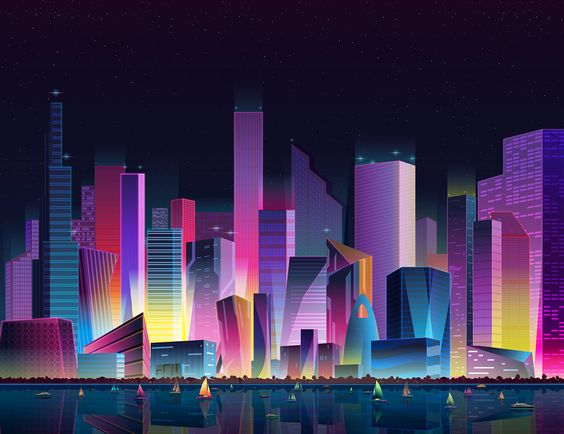

#**Commits**

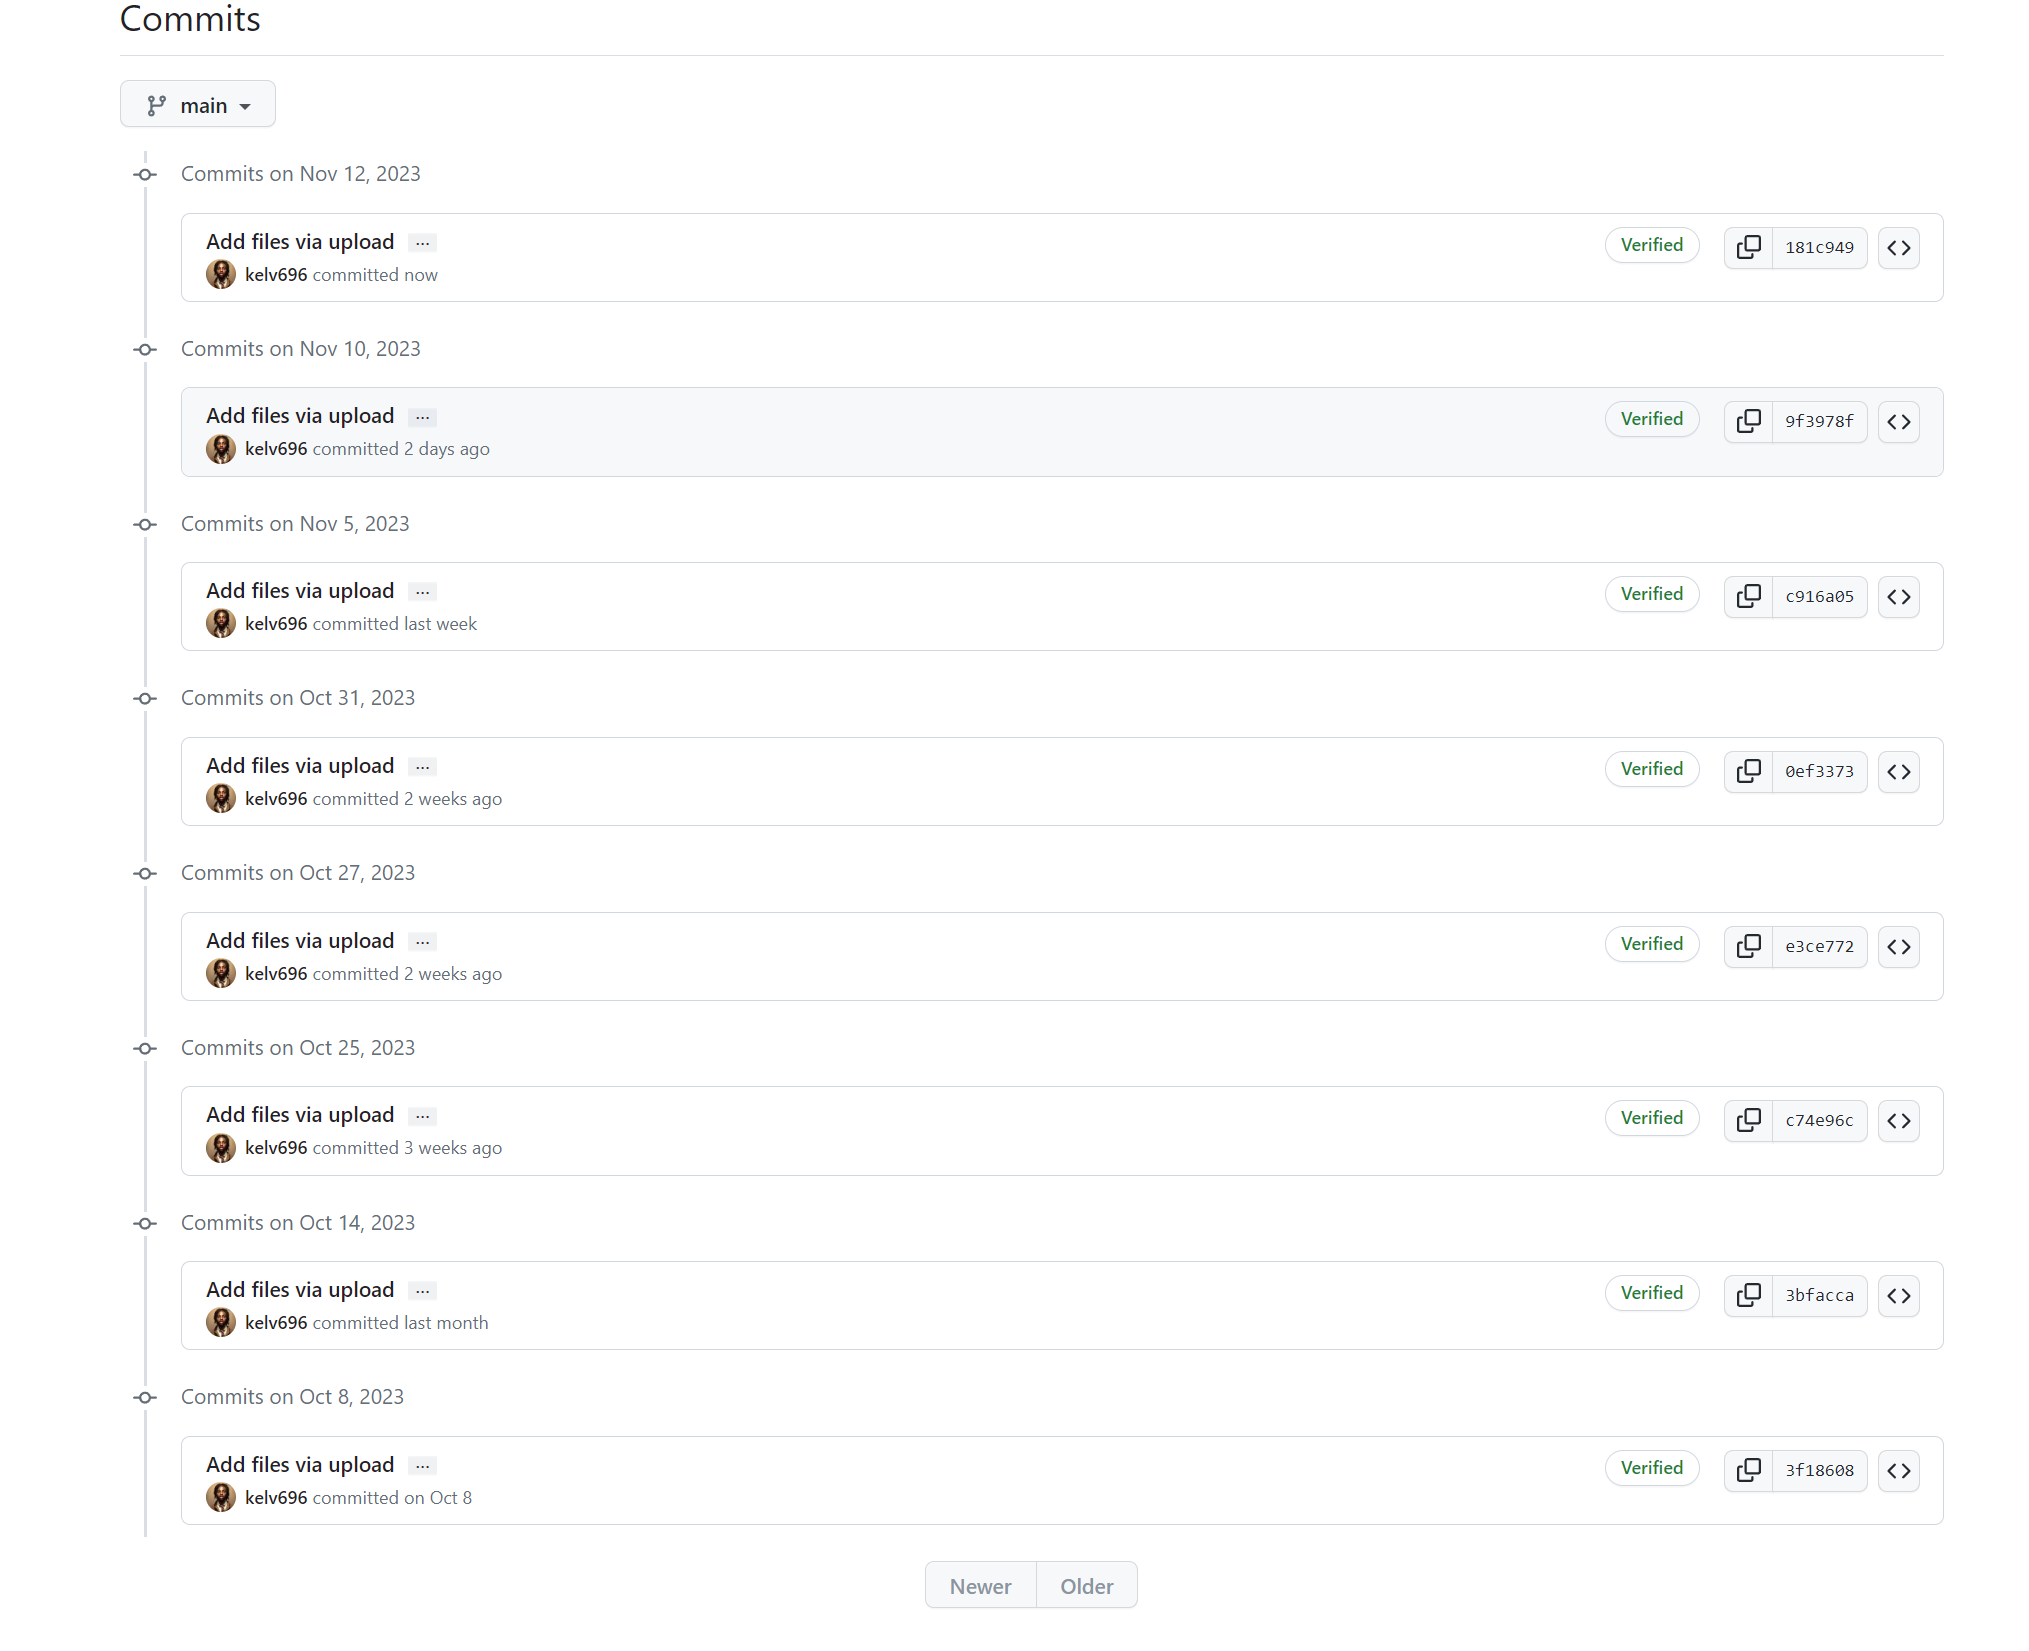